In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest , f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data =pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.shape

(8425, 23)

In [4]:
data.isnull().sum().sort_values(ascending=False)

Sunshine         3994
Evaporation      3512
Cloud3pm         2455
Cloud9am         2421
Pressure3pm      1312
Pressure9am      1309
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
RainToday         240
Rainfall          240
RainTomorrow      239
WindSpeed3pm      107
Humidity3pm       102
Temp3pm            96
WindSpeed9am       76
MinTemp            75
MaxTemp            60
Humidity9am        59
Temp9am            56
Location            0
Date                0
dtype: int64

In [5]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [6]:
data =data.dropna(axis =0)
data.shape

(3790, 23)

In [7]:
data =data.drop(['Date','Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,CoffsHarbour,19.8,27.1,24.4,ESE,35.0,SW,ESE,17.0,22.0,83.0,60.0,1018.9,1017.9,22.0,26.0,Yes,Yes
908,CoffsHarbour,18.7,25.6,6.8,E,33.0,SW,S,17.0,13.0,85.0,90.0,1020.7,1020.1,21.0,20.9,Yes,Yes
909,CoffsHarbour,16.5,25.5,16.8,WSW,19.0,WSW,ESE,6.0,9.0,84.0,65.0,1021.5,1020.1,21.0,24.5,Yes,No
910,CoffsHarbour,18.5,26.9,0.0,ENE,30.0,SW,ENE,7.0,20.0,68.0,60.0,1018.9,1016.6,23.3,26.4,No,No
911,CoffsHarbour,18.2,28.2,0.0,NNE,50.0,NNW,NE,13.0,35.0,67.0,68.0,1016.3,1012.8,24.0,25.9,No,Yes


In [11]:
le =LabelEncoder()
data["WindGustDir"]=le.fit_transform(data["WindGustDir"])
data["WindDir9am"]=le.fit_transform(data["WindDir9am"])
data["WindDir3pm"]=le.fit_transform(data["WindDir3pm"])
data["RainToday"]=le.fit_transform(data["RainToday"])
data["RainTomorrow"]=le.fit_transform(data["RainTomorrow"])
data['Location']=le.fit_transform(data['Location'])

In [12]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,1,19.8,27.1,24.4,2,35.0,12,2,17.0,22.0,83.0,60.0,1018.9,1017.9,22.0,26.0,1,1
908,1,18.7,25.6,6.8,0,33.0,12,8,17.0,13.0,85.0,90.0,1020.7,1020.1,21.0,20.9,1,1
909,1,16.5,25.5,16.8,15,19.0,15,2,6.0,9.0,84.0,65.0,1021.5,1020.1,21.0,24.5,1,0
910,1,18.5,26.9,0.0,1,30.0,12,1,7.0,20.0,68.0,60.0,1018.9,1016.6,23.3,26.4,0,0
911,1,18.2,28.2,0.0,5,50.0,6,4,13.0,35.0,67.0,68.0,1016.3,1012.8,24.0,25.9,0,1


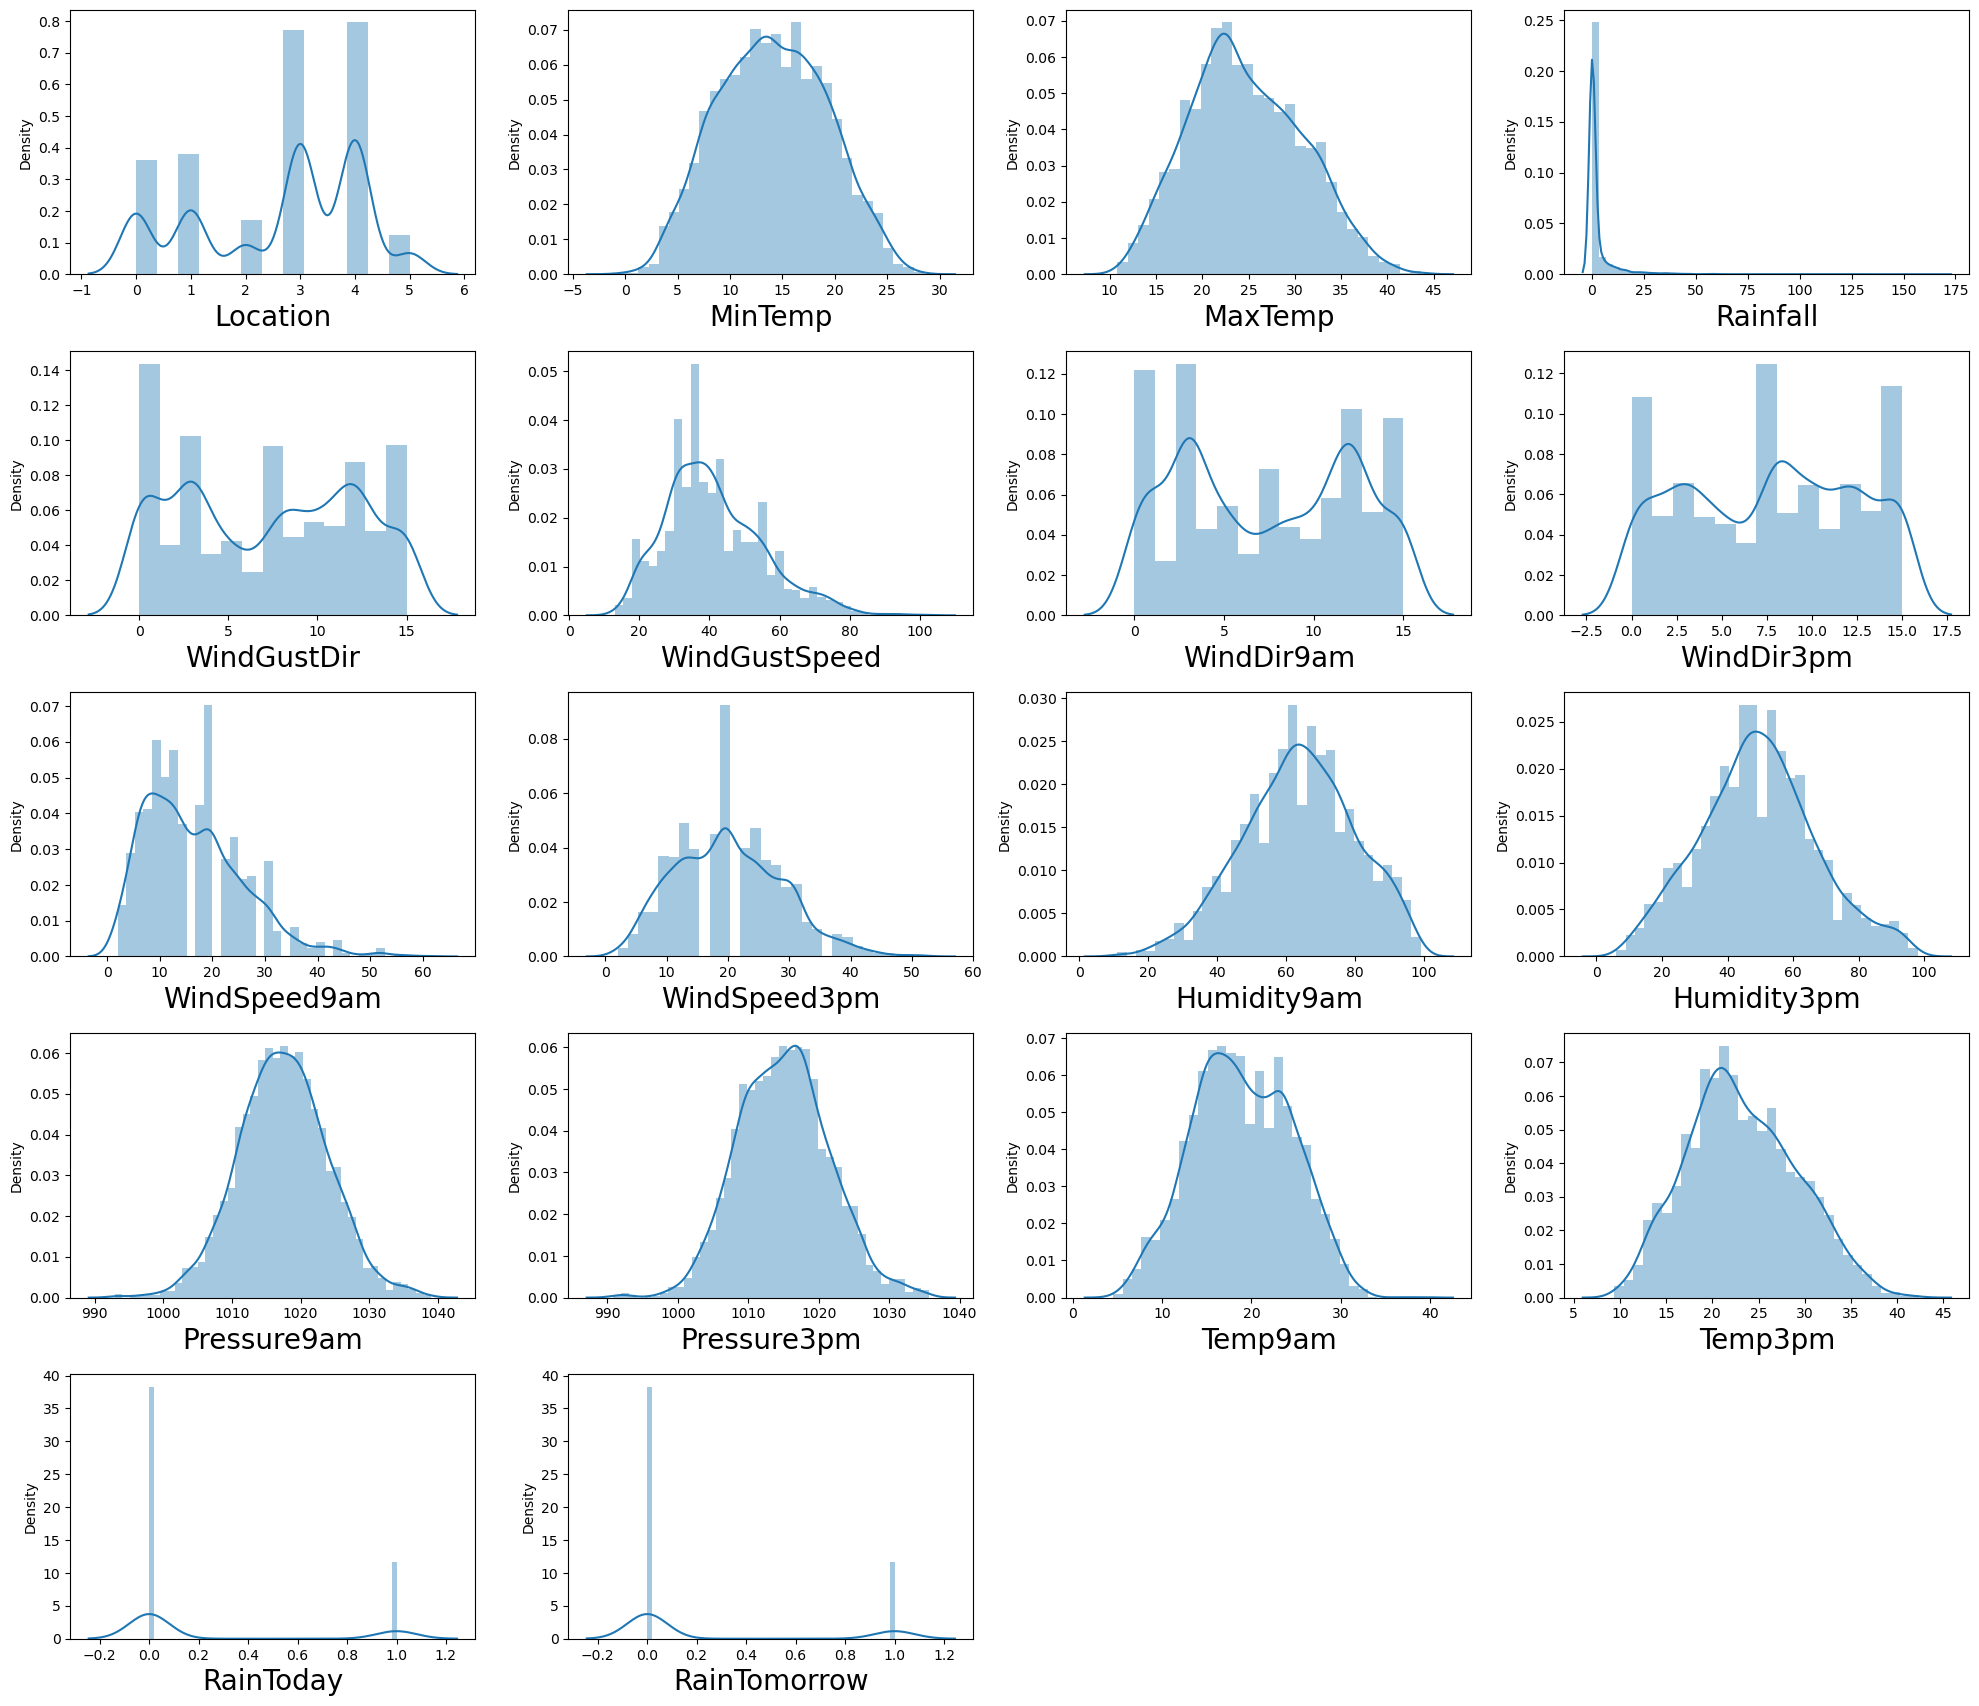

In [13]:
plt.figure(figsize=(20,20) )
plotnumber=1

for column in data:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        

    plotnumber+=1
plt.tight_layout()

In [14]:
x =data.drop(['RainTomorrow'], axis =1)
y =data['RainTomorrow']

In [15]:
x.skew().sort_values(ascending=False)

Rainfall         7.592966
RainToday        1.253358
WindSpeed9am     0.935658
WindGustSpeed    0.699143
WindSpeed3pm     0.356434
Temp3pm          0.239057
MaxTemp          0.237727
Humidity3pm      0.174915
Pressure3pm      0.096222
MinTemp          0.039516
Pressure9am      0.032381
WindDir9am       0.030790
Temp9am          0.029503
WindGustDir      0.004110
WindDir3pm      -0.054372
Humidity9am     -0.194562
Location        -0.510193
dtype: float64

In [16]:
x_new =power_transform(x)
x = pd.DataFrame(x_new, columns= x.columns)
x.skew().sort_values(ascending=False)

RainToday        1.253358
Rainfall         1.061623
Pressure3pm      0.000000
Pressure9am     -0.000278
WindGustSpeed   -0.004561
Temp3pm         -0.021361
MaxTemp         -0.021687
WindSpeed9am    -0.026645
Humidity3pm     -0.027673
WindSpeed3pm    -0.044625
Temp9am         -0.049757
Humidity9am     -0.050080
MinTemp         -0.069765
WindDir9am      -0.222210
WindDir3pm      -0.252130
WindGustDir     -0.259226
Location        -0.346425
dtype: float64

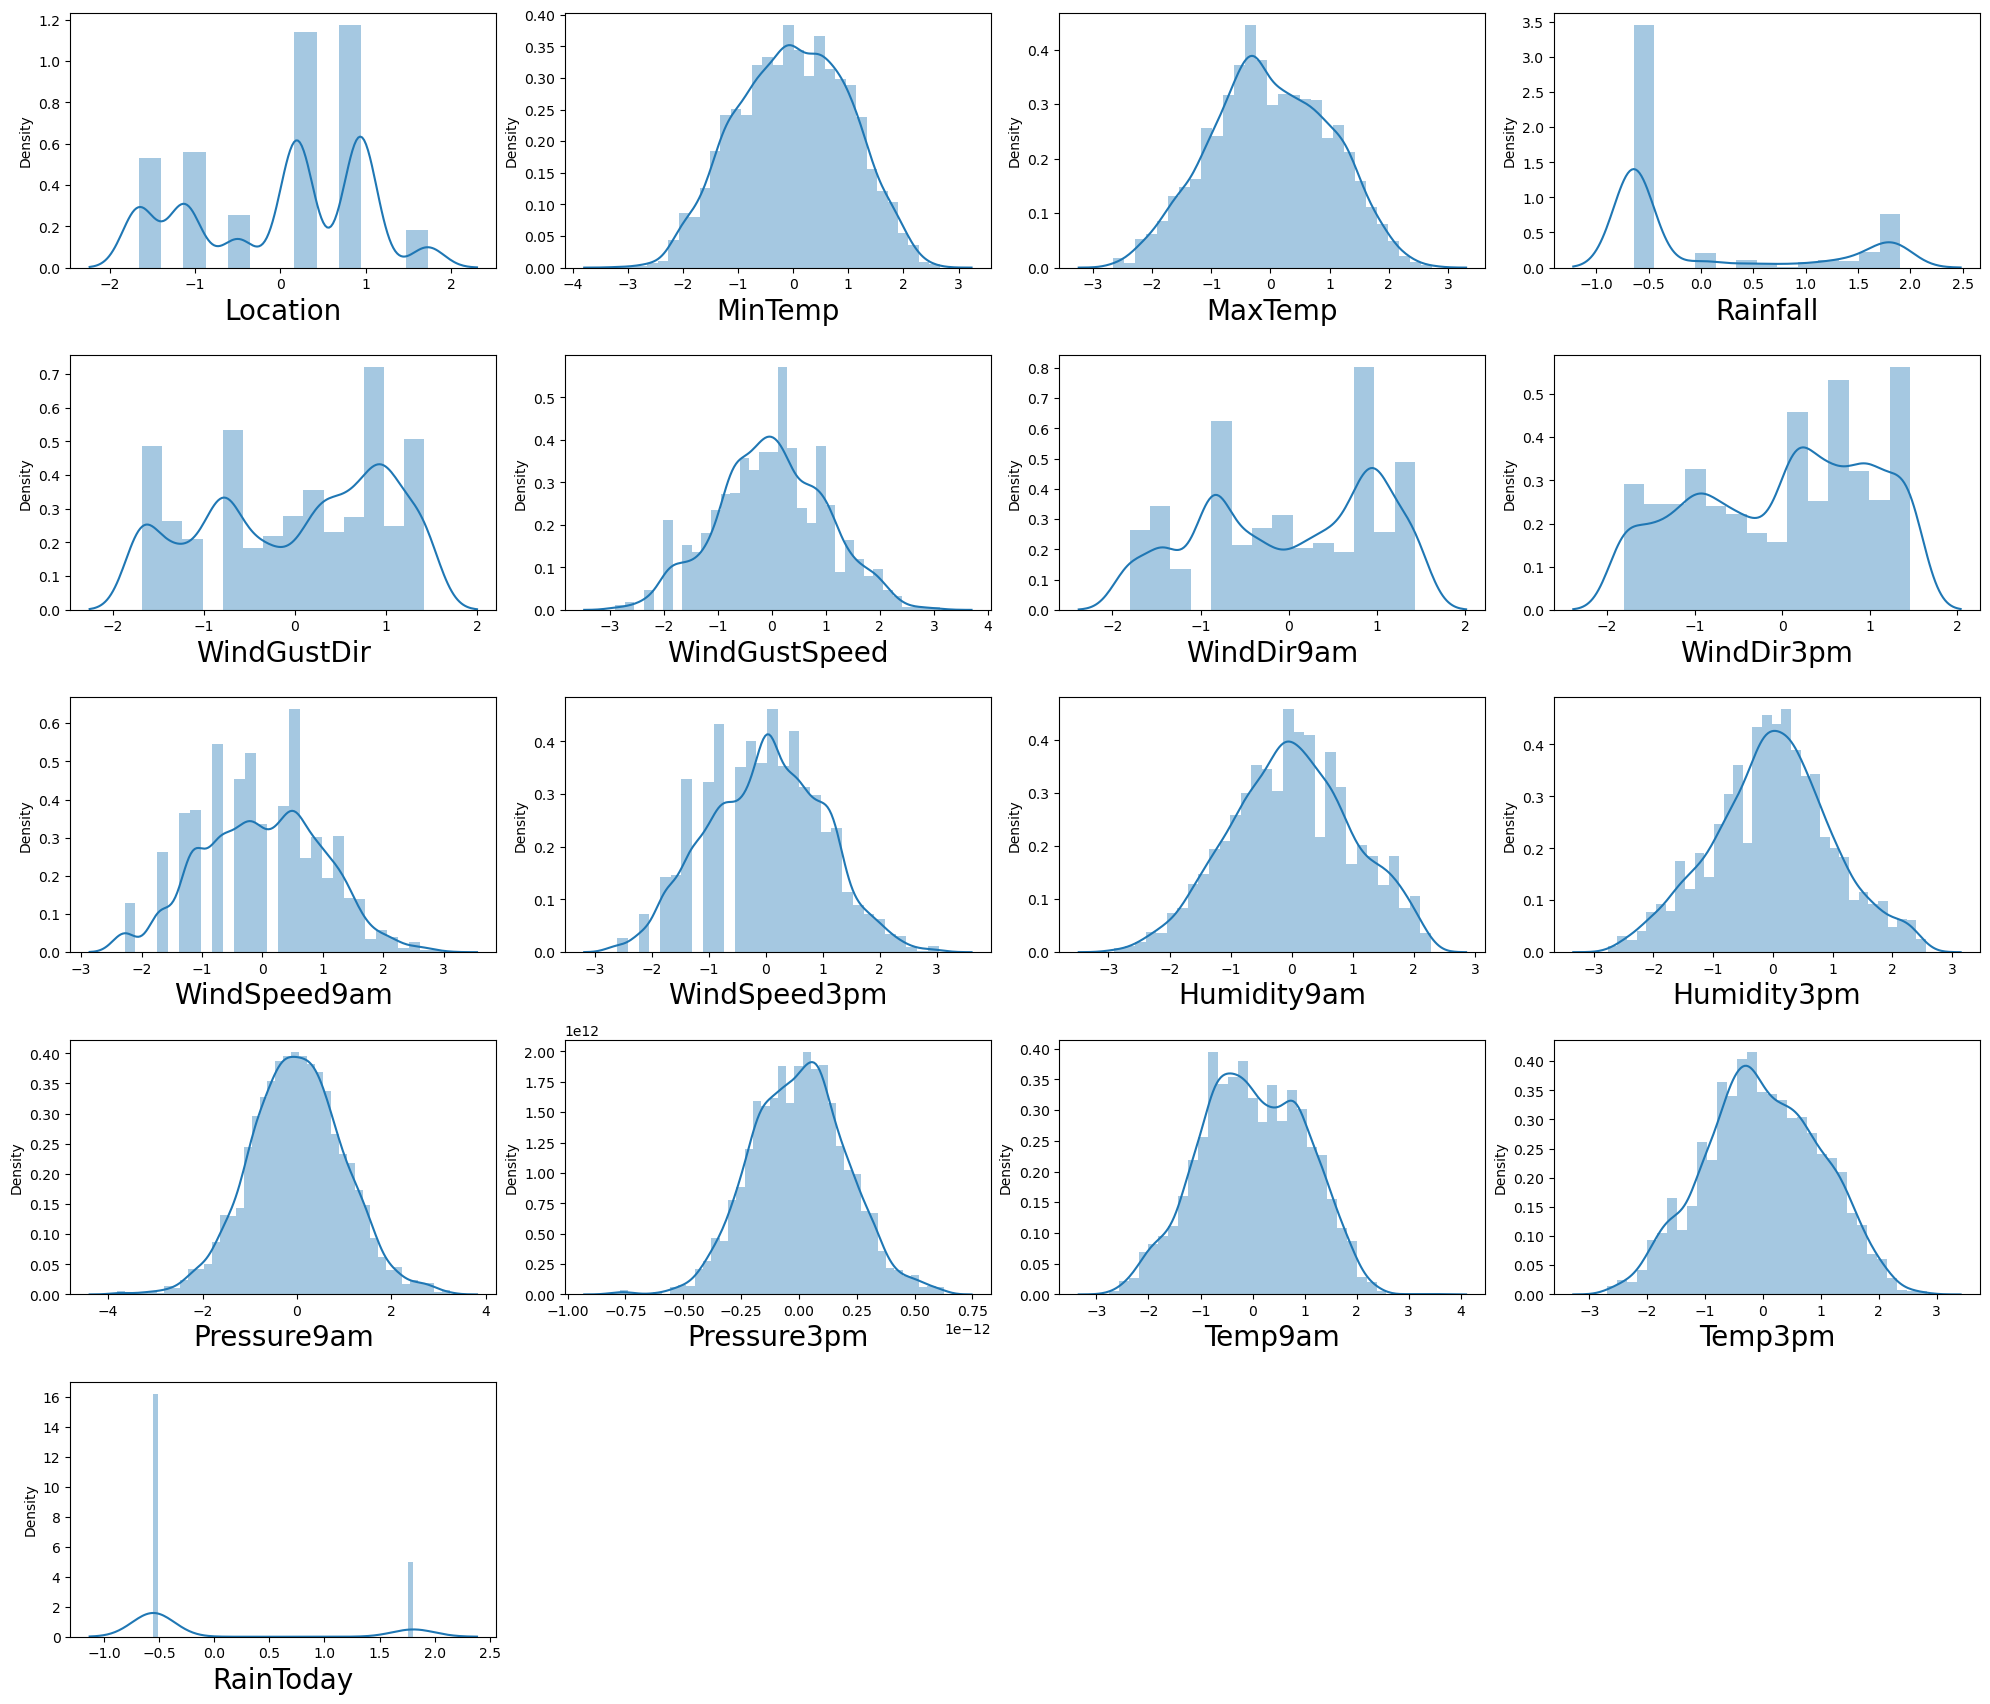

In [18]:
plt.figure(figsize=(20,20) )
plotnumber=1

for column in x:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        

    plotnumber+=1
plt.tight_layout()

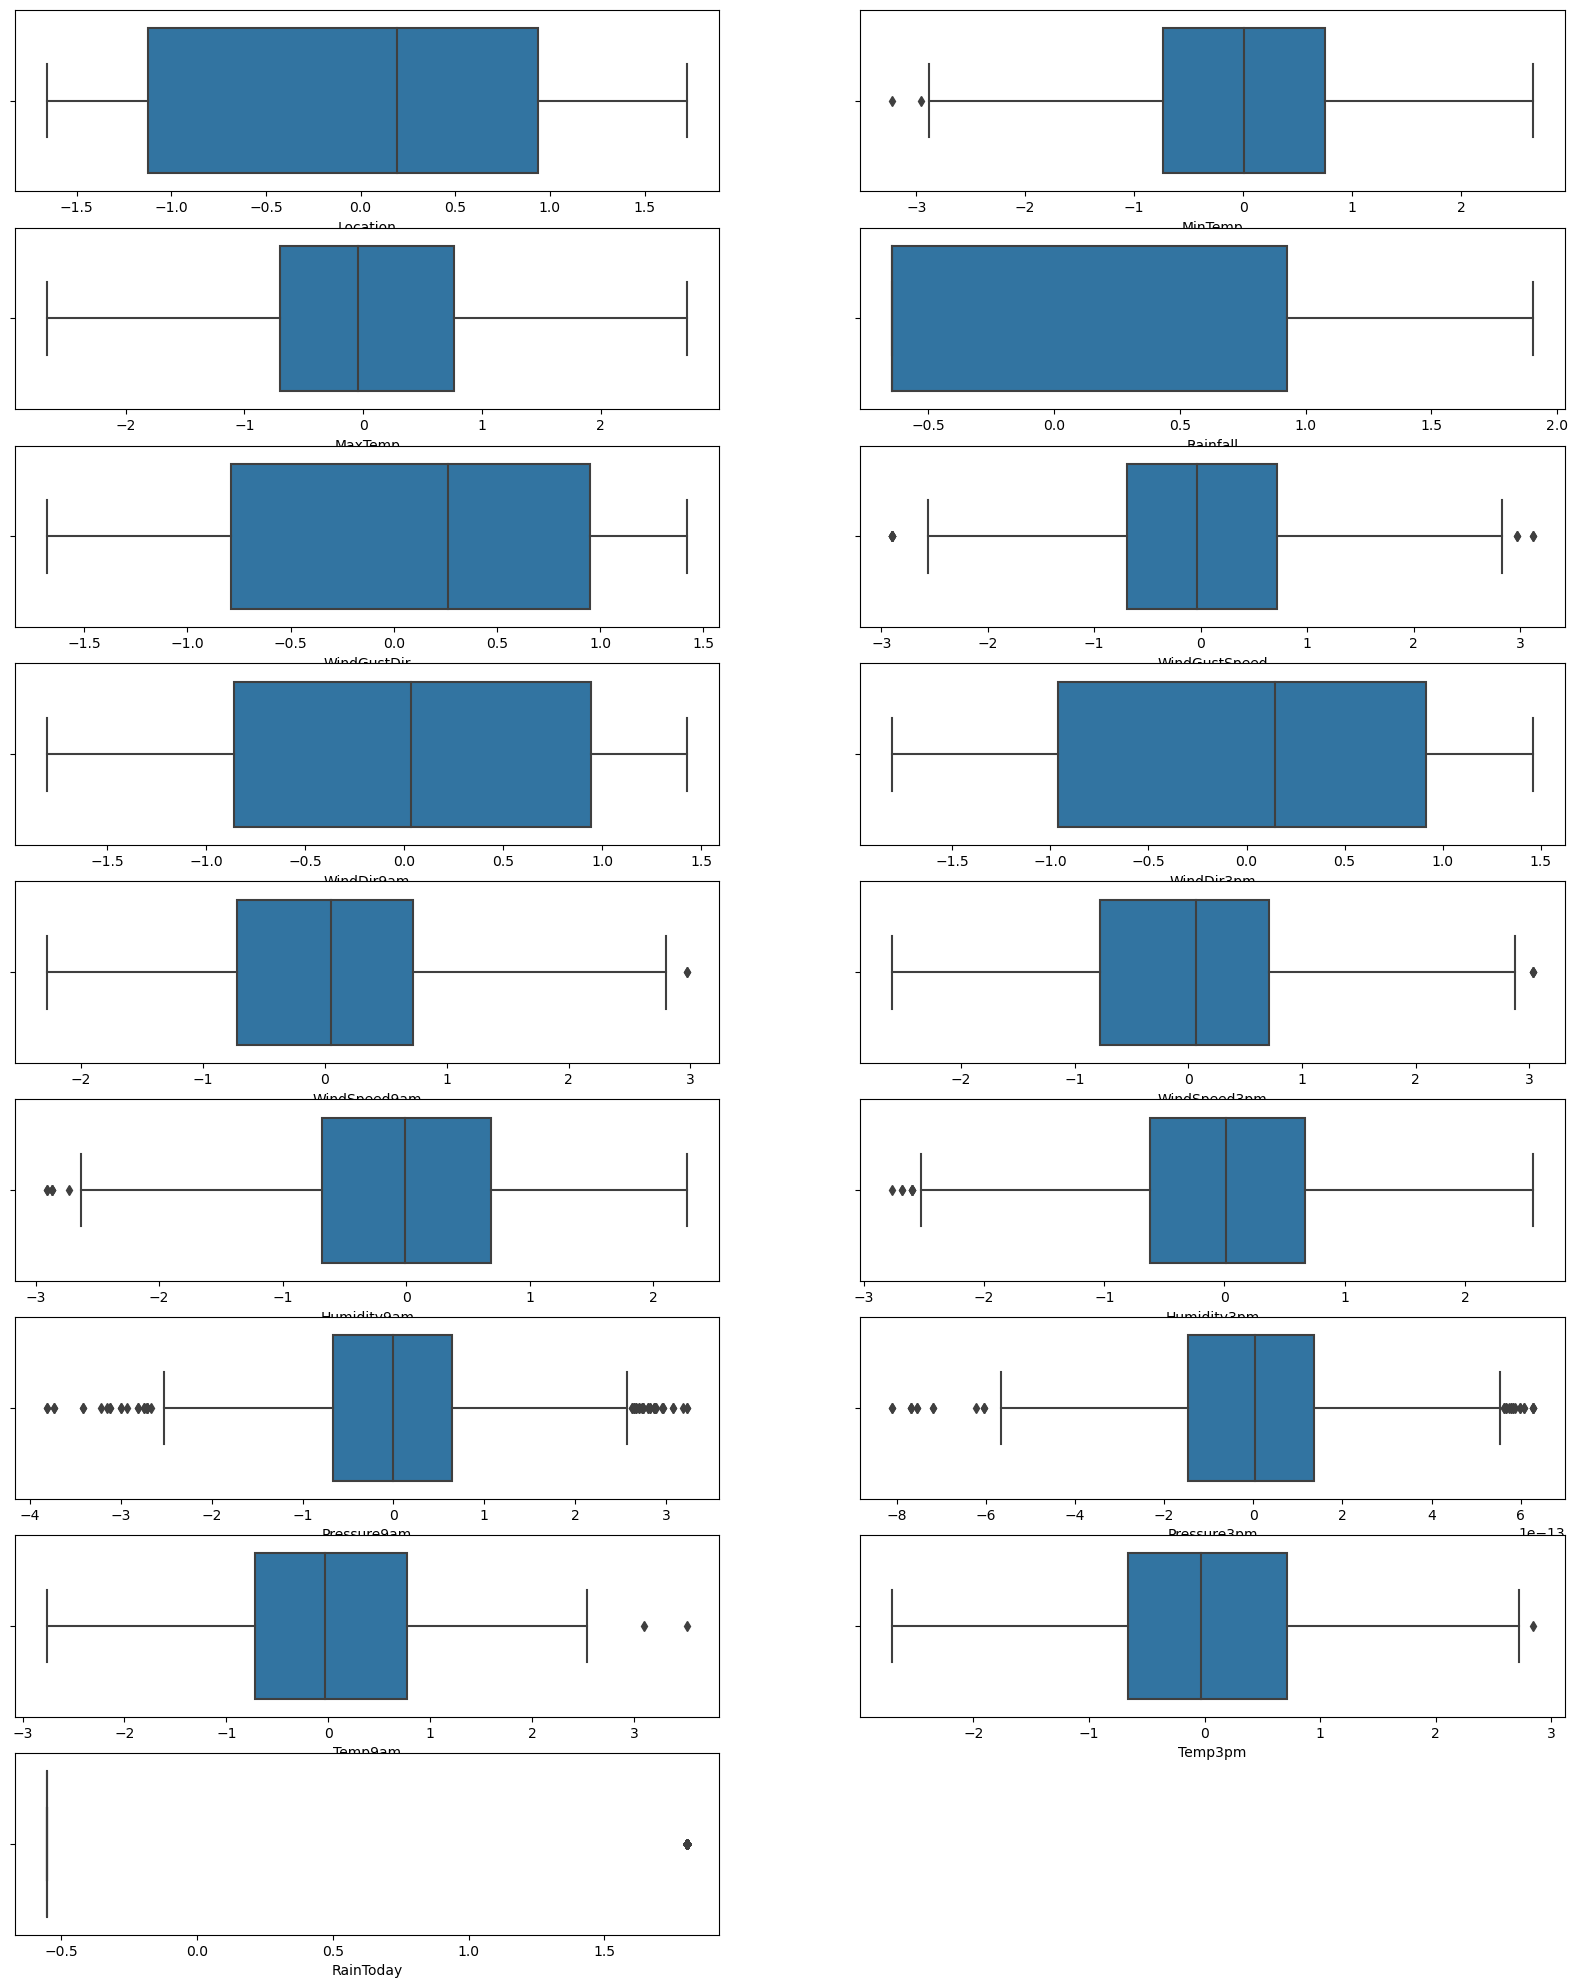

In [19]:
plt.figure(figsize=(20,25))
graph=1

for column in x:
    if graph<=18: 
        ax=plt.subplot(9,2,graph)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=10)
        

    graph+=1
plt.show()

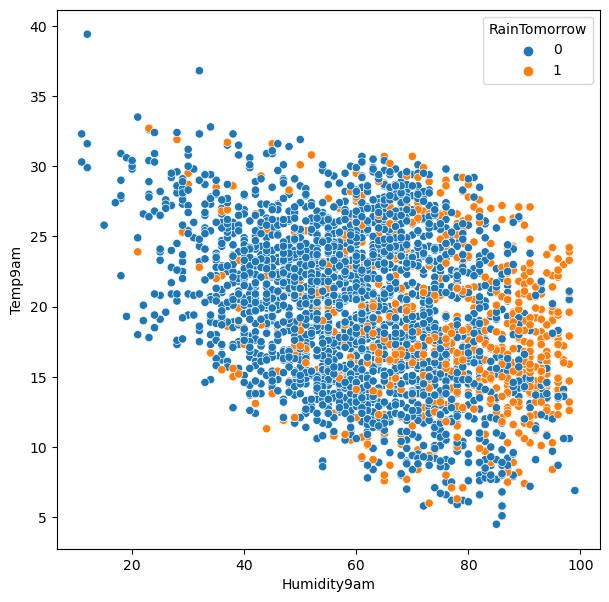

In [21]:
plt.figure(figsize=(7,7))
sns.scatterplot( x ="Humidity9am" , y="Temp9am" , hue ="RainTomorrow" , data =data)
plt.show()

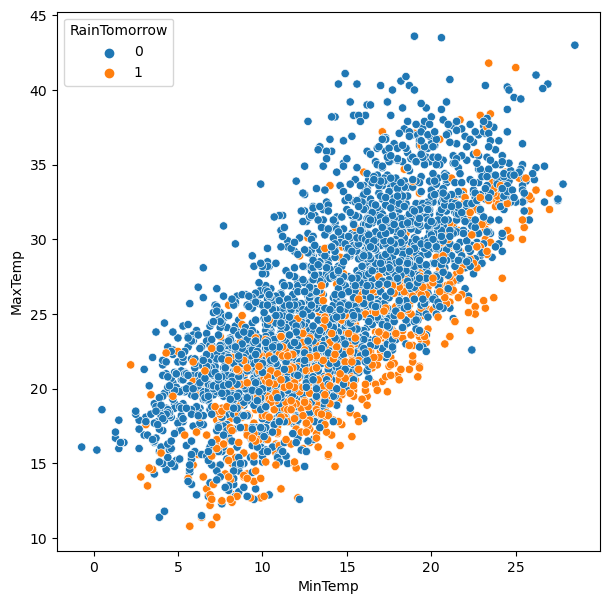

In [23]:
plt.figure(figsize=(7,7))
sns.scatterplot( x ="MinTemp" , y="MaxTemp" , hue ="RainTomorrow" , data =data)
plt.show()

In [24]:
scaler = StandardScaler()
x_scaled =scaler.fit_transform(x)

In [25]:
x_scaled.shape[1]

17

In [26]:
x.shape

(3790, 17)

In [27]:
y.shape

(3790,)

In [28]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test =train_test_split(x,y ,test_size= 0.25, random_state =i)
    rfc =RandomForestClassifier()
    rfc.fit(x_train,y_train)
    y_pred =rfc.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print('accuracy',acc,'random state',i)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('accuracy', maxAccu, 'random state',i)

accuracy 0.8913502109704642 random state 1
accuracy 0.8913502109704642 random state 1
accuracy 0.9018987341772152 random state 2
accuracy 0.9018987341772152 random state 2
accuracy 0.9061181434599156 random state 3
accuracy 0.9061181434599156 random state 3
accuracy 0.8913502109704642 random state 4
accuracy 0.9029535864978903 random state 5
accuracy 0.9018987341772152 random state 6
accuracy 0.8997890295358649 random state 7
accuracy 0.8966244725738397 random state 8
accuracy 0.879746835443038 random state 9
accuracy 0.8924050632911392 random state 10
accuracy 0.9113924050632911 random state 11
accuracy 0.9113924050632911 random state 11
accuracy 0.9061181434599156 random state 12
accuracy 0.8976793248945147 random state 13
accuracy 0.9050632911392406 random state 14
accuracy 0.8955696202531646 random state 15
accuracy 0.9135021097046413 random state 16
accuracy 0.9135021097046413 random state 16
accuracy 0.9029535864978903 random state 17
accuracy 0.8987341772151899 random state 18
a

In [29]:
x_train,x_test,y_train,y_test =train_test_split(x,y ,test_size= 0.25, random_state =121)

In [30]:
lr =LogisticRegression()
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)

In [31]:
# accuracy
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.859704641350211

In [32]:
# confusion matrix
con_mat =confusion_matrix(y_test,y_pred)
con_mat

array([[696,  35],
       [ 98, 119]], dtype=int64)

In [33]:
# classifier report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       731
           1       0.77      0.55      0.64       217

    accuracy                           0.86       948
   macro avg       0.82      0.75      0.78       948
weighted avg       0.85      0.86      0.85       948



In [34]:
scr = cross_val_score(lr,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.8385379033193281


In [35]:
# Random Forest Classifier
rf =RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred =rf.predict(x_test)

In [36]:
# accuracy
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.9219409282700421

In [37]:
# confusion matrix
con_mat =confusion_matrix(y_test,y_pred)
con_mat

array([[712,  19],
       [ 55, 162]], dtype=int64)

In [38]:
# classifier report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       731
           1       0.90      0.75      0.81       217

    accuracy                           0.92       948
   macro avg       0.91      0.86      0.88       948
weighted avg       0.92      0.92      0.92       948



In [39]:
scr = cross_val_score(rf,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.8973503804604777


In [40]:
# Decision Tree Classifier
dtc =DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred =dtc.predict(x_test)

In [41]:
# accuracy
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.8628691983122363

In [42]:
# confusion matrix
con_mat =confusion_matrix(y_test,y_pred)
con_mat

array([[658,  73],
       [ 57, 160]], dtype=int64)

In [43]:
# classifier report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       731
           1       0.69      0.74      0.71       217

    accuracy                           0.86       948
   macro avg       0.80      0.82      0.81       948
weighted avg       0.87      0.86      0.86       948



In [44]:
scr = cross_val_score(dtc,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.8427194003621734


In [45]:
# KNN Classifier
knn =KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred =knn.predict(x_test)

In [46]:
# accuracy
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.8417721518987342

In [47]:
# confusion matrix
con_mat =confusion_matrix(y_test,y_pred)
con_mat

array([[678,  53],
       [ 97, 120]], dtype=int64)

In [48]:
# classifier report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       731
           1       0.69      0.55      0.62       217

    accuracy                           0.84       948
   macro avg       0.78      0.74      0.76       948
weighted avg       0.83      0.84      0.84       948



In [49]:
scr = cross_val_score(knn,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.8232258186813677


In [50]:
rfc = RandomForestClassifier()

In [60]:

params ={'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[8,15],
          'min_samples_split':[2,11],
           'min_samples_leaf':[2,10]}

In [61]:
grd =GridSearchCV(rfc,param_grid=params)

In [62]:
grd.fit(x_train,y_train)
print('best_params = ',grd.best_params_)

best_params =  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 15}


In [63]:
rfc =grd.best_estimator_ 

In [64]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       n_estimators=15)

In [65]:
y_pred =rfc.predict(x_test)

In [66]:
print("accuracy rf normal:",accuracy_score(y_test,y_pred))

print("\n","confusion matrix","\n",confusion_matrix(y_test,y_pred))

print("\n","report :",classification_report(y_test,y_pred))

accuracy rf normal: 0.9029535864978903

 confusion matrix 
 [[702  29]
 [ 63 154]]

 report :               precision    recall  f1-score   support

           0       0.92      0.96      0.94       731
           1       0.84      0.71      0.77       217

    accuracy                           0.90       948
   macro avg       0.88      0.84      0.85       948
weighted avg       0.90      0.90      0.90       948



In [68]:
from sklearn.metrics import plot_roc_curve

# Training

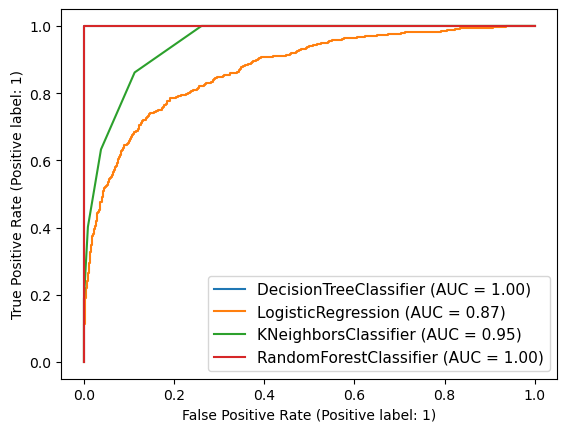

In [69]:
disp =plot_roc_curve(dtc,x_train,y_train)

plot_roc_curve(lr,x_train,y_train,ax=disp.ax_) # ax_  = Axes with confusion matrix

plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)

plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

plt.show()

# Testing

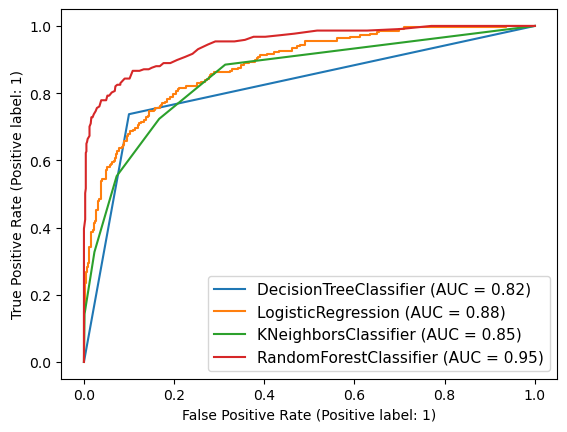

In [70]:
disp =plot_roc_curve(dtc,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_) # ax_  = Axes with confusion matrix

plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

plt.show()